In [77]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt

In [78]:
pyodbc.drivers()

['SQL Server Native Client 11.0',
 'ODBC Driver 17 for SQL Server',
 'SQL Server Native Client RDA 11.0',
 'ODBC Driver 18 for SQL Server']

In [79]:
# Some other example server values are
# server = 'localhost\sqlexpress' # for a named instance
# server = 'myserver,port' # to specify an alternate port
server = 'DESKTOP-BT960M3\DWSQL' 
database = 'AdventureWorks2019'   
cnxn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server+';DATABASE='+database+'; trusted_connection=YES;')
cursor = cnxn.cursor()


In [80]:
def getQueryData(query):
    df = pd.read_sql(query, cnxn)
    return df



In [81]:
query_one = """SELECT DISTINCT YEAR(OrderDate) FROM Sales.SalesOrderHeader;"""

       
0  2013
1  2014
2  2011
3  2012


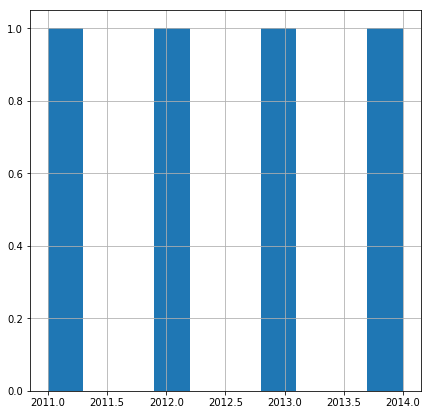

In [82]:
series = getQueryData(query_one)
print(series)
series.hist(figsize=(7, 7))
plt.show()

In [94]:
query_two = """SELECT SalesOrderID, YEAR(OrderDate) as 'YEAR', TotalDue
FROM Sales.SalesOrderHeader
WHERE YEAR(OrderDate) = (
    SELECT MIN(YEAR(OrderDate)) FROM Sales.SalesOrderHeader
);
"""

print(getQueryData(query_two).head())

   SalesOrderID  YEAR    TotalDue
0         43659  2011  23153.2339
1         43660  2011   1457.3288
2         43661  2011  36865.8012
3         43662  2011  32474.9324
4         43663  2011    472.3108


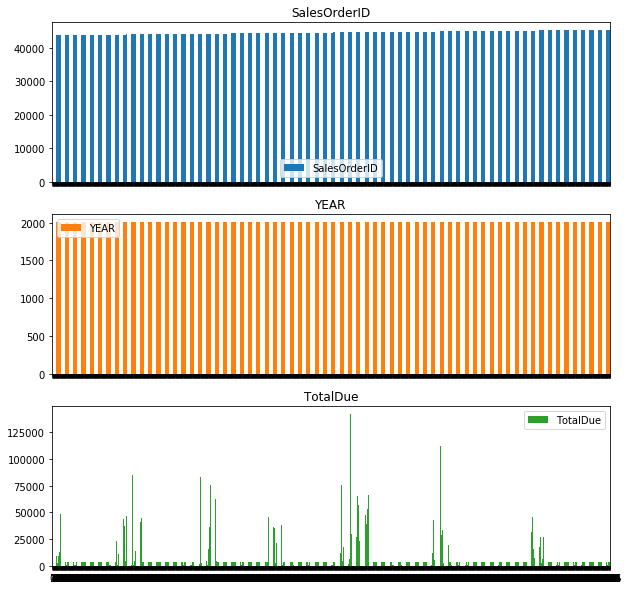

In [71]:
axes = getQueryData(query_two).plot.bar(rot=0, subplots=True, figsize=(10, 10))
axes[1].legend(loc=2)

In [88]:
query_three = """
SELECT YEAR(OrderDate) AS Year, MONTH(OrderDate) AS Month, SalesOrderID, TotalDue 
FROM
Sales.SalesOrderHeader WHERE MONTH(OrderDate) = 5
"""

In [92]:
print(getQueryData(query_three).head())

   Year  Month  SalesOrderID    TotalDue
0  2011      5         43659  23153.2339
1  2011      5         43660   1457.3288
2  2011      5         43661  36865.8012
3  2011      5         43662  32474.9324
4  2011      5         43663    472.3108


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023C5211E320>,
      dtype=object)

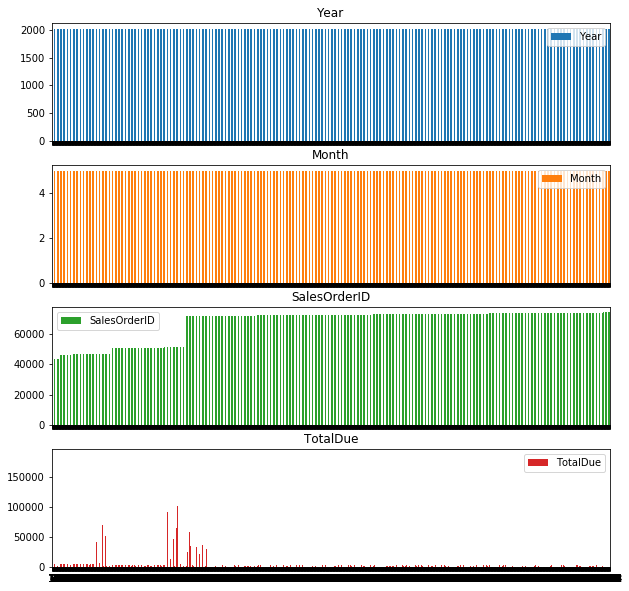

In [93]:
getQueryData(query_three).plot.bar(rot=0, subplots=True, figsize=(10, 10))